In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
from scipy.stats import linregress
import seaborn as sns

In [2]:
transactions = pd.read_csv('customer_transaction_data.csv')
item_data = pd.read_csv('item_data.csv')
demographic = pd.read_csv('customer_demographics.csv')

In [3]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1324566 entries, 0 to 1324565
Data columns (total 7 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   date             1324566 non-null  object 
 1   customer_id      1324566 non-null  int64  
 2   item_id          1324566 non-null  int64  
 3   quantity         1324566 non-null  int64  
 4   selling_price    1324566 non-null  float64
 5   other_discount   1324566 non-null  float64
 6   coupon_discount  1324566 non-null  float64
dtypes: float64(3), int64(3), object(1)
memory usage: 70.7+ MB


In [4]:
item_data.head()

,item_id,brand,brand_type,category
0,1,1,Established,Grocery
1,2,1,Established,Miscellaneous
2,3,56,Local,Bakery
3,4,56,Local,Grocery
4,5,56,Local,Grocery


In [5]:
item_transaction_count = transactions['item_id'].value_counts()

In [6]:
item_transaction_count.reset_index()

,index,item_id
0,49009,13540
1,34047,6308
2,13174,3879
3,45502,3292
4,29847,2276
...,...,...
74058,438,1
74059,1394,1
74060,403,1
74061,62918,1


In [7]:
item_merge = pd.merge(item_transaction_count,item_data)
item_merge.columns = ['count', 'brand', 'brand_type', 'category']
item_merge

,count,brand,brand_type,category
0,13540,4350,Established,Pharmaceutical
1,6308,1981,Established,Pharmaceutical
2,3879,56,Local,Grocery
3,3292,782,Established,Grocery
4,2276,4817,Established,Grocery
...,...,...,...,...
74058,1,1,Established,Grocery
74059,1,1,Established,Grocery
74060,1,1,Established,Grocery
74061,1,1,Established,Grocery


In [8]:
tx_demographic = pd.merge(transactions,demographic,on='customer_id',how='inner')
tx_demographic.shape

(791602, 13)

# Regression

In [9]:
transactions

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount
0,2012-01-02,1501,26830,1,35.26,-10.69,0.0
1,2012-01-02,1501,54253,1,53.43,-13.89,0.0
2,2012-01-02,1501,31962,1,106.50,-14.25,0.0
3,2012-01-02,1501,33647,1,67.32,0.00,0.0
4,2012-01-02,1501,48199,1,71.24,-28.14,0.0
...,...,...,...,...,...,...,...
1324561,2013-06-30,1129,2777,1,284.60,-71.24,0.0
1324562,2013-06-30,1129,2953,4,42.74,-28.50,0.0
1324563,2013-06-30,1129,2971,6,64.12,-42.74,0.0
1324564,2013-06-30,1129,46984,1,95.82,0.00,0.0


In [10]:
transaction_stats=transactions.groupby('item_id')\
.agg(average_selling_price =('selling_price','mean'),average_other_discount = ('other_discount','mean'),\
     average_coupon_discount = ('coupon_discount','mean'),average_quantity = ('quantity','mean')).reset_index()

transaction_stats.head(20)

,item_id,average_selling_price,average_other_discount,average_coupon_discount,average_quantity
0,1,124.310,0.000,0.0,1.0
1,2,35.260,0.000,0.0,1.0
2,3,56.640,0.000,0.0,1.0
3,4,54.850,0.000,0.0,1.0
4,5,81.570,0.000,0.0,1.0
5,6,49.690,0.000,0.0,1.5
6,7,270.360,0.000,0.0,1.0
7,8,89.050,-28.140,0.0,1.0
8,9,198.760,-32.770,0.0,2.0
9,10,97.960,0.000,0.0,1.0


In [11]:
transaction_stats = pd.merge(transaction_stats,item_data,on='item_id',how='left')
transaction_stats

,item_id,average_selling_price,average_other_discount,average_coupon_discount,average_quantity,brand,brand_type,category
0,1,124.31,0.0,0.0,1.0,1,Established,Grocery
1,2,35.26,0.0,0.0,1.0,1,Established,Miscellaneous
2,3,56.64,0.0,0.0,1.0,56,Local,Bakery
3,4,54.85,0.0,0.0,1.0,56,Local,Grocery
4,5,81.57,0.0,0.0,1.0,56,Local,Grocery
...,...,...,...,...,...,...,...,...
74058,74062,447.03,0.0,0.0,1.0,5490,Established,Pharmaceutical
74059,74063,414.97,0.0,0.0,1.0,5497,Established,Pharmaceutical
74060,74064,414.97,0.0,0.0,1.0,5497,Established,Pharmaceutical
74061,74065,127.88,0.0,0.0,1.0,5520,Established,Pharmaceutical


In [12]:
transaction_stats = pd.get_dummies(transaction_stats,columns = ['brand_type','category'])

In [13]:
regression_data = transaction_stats.drop(['item_id','brand'],axis=1)
regression_data

,average_selling_price,average_other_discount,average_coupon_discount,average_quantity,brand_type_Established,brand_type_Local,category_Alcohol,category_Bakery,"category_Dairy, Juices & Snacks",category_Flowers & Plants,...,category_Natural Products,category_Packaged Meat,category_Pharmaceutical,category_Prepared Food,category_Restauarant,category_Salads,category_Seafood,category_Skin & Hair Care,category_Travel,category_Vegetables (cut)
0,124.31,0.0,0.0,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,35.26,0.0,0.0,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,56.64,0.0,0.0,1.0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,54.85,0.0,0.0,1.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,81.57,0.0,0.0,1.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74058,447.03,0.0,0.0,1.0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
74059,414.97,0.0,0.0,1.0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
74060,414.97,0.0,0.0,1.0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
74061,127.88,0.0,0.0,1.0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


# Clustering

In [14]:
demographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     760 non-null    int64 
 1   age_range       760 non-null    object
 2   marital_status  431 non-null    object
 3   rented          760 non-null    int64 
 4   family_size     760 non-null    object
 5   no_of_children  222 non-null    object
 6   income_bracket  760 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 41.7+ KB


In [15]:
demographic.marital_status = demographic.marital_status.fillna('Unknown')
demographic.no_of_children = demographic.no_of_children.fillna('Unknown')
demographic = demographic.drop(['customer_id'],axis=1)

In [16]:
pd.get_dummies(demographic)

,rented,income_bracket,age_range_18-25,age_range_26-35,age_range_36-45,age_range_46-55,age_range_56-70,age_range_70+,marital_status_Married,marital_status_Single,marital_status_Unknown,family_size_1,family_size_2,family_size_3,family_size_4,family_size_5+,no_of_children_1,no_of_children_2,no_of_children_3+,no_of_children_Unknown
0,0,4,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1
1,0,5,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1
2,0,3,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0
3,0,6,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0
4,0,5,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,0,5,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1
756,0,6,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0
757,0,4,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1
758,0,5,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1


In [17]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
demographic_label_encoded = demographic.copy()
demographic_label_encoded[['age_range','marital_status','no_of_children','family_size']] = encoder.fit_transform(demographic[['age_range','marital_status','no_of_children','family_size']])
demographic_label_encoded

,age_range,marital_status,rented,family_size,no_of_children,income_bracket
0,5.0,0.0,0,1.0,3.0,4
1,3.0,0.0,0,1.0,3.0,5
2,1.0,2.0,0,2.0,0.0,3
3,1.0,2.0,0,3.0,1.0,6
4,3.0,1.0,0,0.0,3.0,5
...,...,...,...,...,...,...
755,2.0,2.0,0,1.0,3.0,5
756,3.0,0.0,0,2.0,0.0,6
757,3.0,2.0,0,0.0,3.0,4
758,1.0,2.0,0,1.0,3.0,5


<AxesSubplot:>

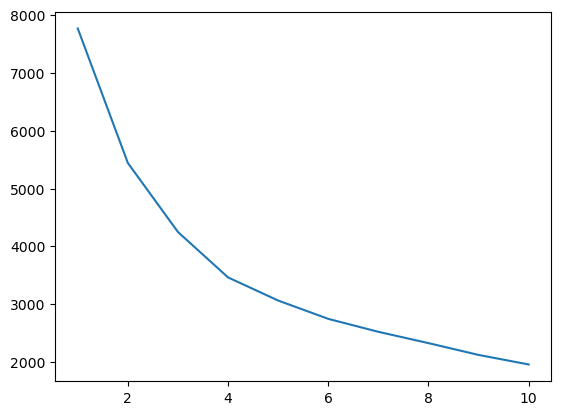

In [18]:
from sklearn.cluster import KMeans 

inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(demographic_label_encoded)
    inertia.append(kmeans.inertia_)
inertia

sns.lineplot(x=[x for x in range(1,11)],y=inertia)


In [19]:
kmeans_1 = KMeans(n_clusters=4,max_iter=1000)
kmeans_1.fit(demographic_label_encoded)
predictions = pd.DataFrame(kmeans_1.predict(demographic_label_encoded))

demographic_result = pd.concat([demographic_label_encoded,predictions],axis=1)

In [20]:
pd.DataFrame(kmeans_new.cluster_centers_,columns=list(demographic_label_encoded.columns))

NameError: name 'kmeans_new' is not defined

# Cluster number analysis

In [ ]:
import reval

# Frequency Analysis

In [ ]:
transaction_freq=transactions.groupby(['customer_id','date'])\
.agg(average_selling_price =('selling_price','mean'),average_other_discount = ('other_discount','mean'),\
     average_coupon_discount = ('coupon_discount','mean'),sum_of_quantity = ('quantity','sum')).reset_index()

transaction_customer=transactions.groupby(['customer_id'])\
.agg(average_selling_price =('selling_price','mean'),sum_other_discount = ('other_discount','sum'),\
     sum_coupon_discount = ('coupon_discount','sum'),sum_of_quantity = ('quantity','sum')).reset_index()

freq = transaction_freq.groupby('customer_id').agg(visit_times = ('date','count'))

freq

In [ ]:
transaction_customer = pd.merge(transaction_customer,freq,on='customer_id',how='inner')
transaction_customer

In [ ]:
demographic_new = pd.read_csv('customer_demographics.csv')
demographic_new.marital_status = demographic_new.marital_status.fillna('Unknown')
demographic_new.no_of_children = demographic_new.no_of_children.fillna('Unknown')

encoder = OrdinalEncoder()
demographic_label_encoded = demographic_new.copy()
demographic_label_encoded[['age_range','marital_status','no_of_children','family_size']] = encoder.fit_transform(demographic_new[['age_range','marital_status','no_of_children','family_size']])
demographic_label_encoded

transaction_customer_1 = pd.merge(transaction_customer,demographic_label_encoded,how='inner',on=['customer_id'])
transaction_customer_1

In [ ]:
transaction = pd.read_csv('customer_transaction_data.csv')
transaction_freq=transactions.groupby(['customer_id','date'])\
.agg(average_selling_price =('selling_price','mean'),average_other_discount = ('other_discount','mean'),\
     average_coupon_discount = ('coupon_discount','mean'),sum_of_quantity = ('quantity','sum')).reset_index()

transaction_customer=transactions.groupby(['customer_id'])\
.agg(average_selling_price =('selling_price','mean'),sum_other_discount = ('other_discount','sum'),\
     sum_coupon_discount = ('coupon_discount','sum'),sum_of_quantity = ('quantity','sum')).reset_index()

freq = transaction_freq.groupby('customer_id').agg(visit_times = ('date','count'))

transaction_customer = pd.merge(transaction_customer,freq,on='customer_id',how='inner')

# Dummy

demographic_new = pd.read_csv('customer_demographics.csv')
demographic_new.marital_status = demographic_new.marital_status.fillna('Unknown')
demographic_new.no_of_children = demographic_new.no_of_children.fillna('Unknown')
demographic_new = pd.get_dummies(demographic_new,columns=['age_range','marital_status','rented','no_of_children'])
transaction_customer_1 = pd.merge(transaction_customer,demographic_new,how='inner',on=['customer_id'])
transaction_customer_1

In [ ]:
demographic_new